In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import re
# os.chdir("E:\\GitHub\\QA-abstract-and-reasoning")
sys.path.append("E:\\GitHub\\QA-abstract-and-reasoning")

In [100]:
import pandas as pd
from utils.config import TRAIN_SEG, TEST_SEG

In [109]:
_train_seg = pd.read_csv(TRAIN_SEG).fillna("")

In [110]:
_train_seg['train_seg_y'] = _train_seg['Report']
_train_seg['train_seg_x'] = _train_seg[['Question', 'Dialogue']].apply(lambda x: ' '.join(x), axis=1)

In [111]:
_train_seg['x_len'] = _train_seg['train_seg_x'].apply(lambda x: len(x.strip().split(" ")))

In [54]:
_train_seg.sort_values(by="x_len", inplace=True)

In [105]:
_train_seg

,QID,Brand,Model,Question,Dialogue,Report,train_seg_y,train_seg_x,x_len
79977,Q79978,宝骏,宝骏610,VAVSNVZNZZNXNDHDBDNDBF,怎么,您 描述 问题 清楚,您 描述 问题 清楚,VAVSNVZNZZNXNDHDBDNDBF 怎么,2
1678,Q1679,奔驰,奔驰E级,如图 问题,,这个 毫米波 雷达 问题 需要 重新 调整 一下,这个 毫米波 雷达 问题 需要 重新 调整 一下,如图 问题,2
30893,Q30894,奥迪,奥迪A6,,想 咨询,想 咨询,想 咨询,想 咨询,2
18747,Q18748,雪佛兰,科鲁兹,车内会 异响 怎么回事,,目前 就是 要 检查一下 是不是 由于 相关 部件 存在 干涉 出现 响声 还有 可能 仪表...,目前 就是 要 检查一下 是不是 由于 相关 部件 存在 干涉 出现 响声 还有 可能 仪表...,车内会 异响 怎么回事,3
62495,Q62496,保时捷,保时捷911,....,您好 问题,你好 如果 问题 可以 加 关注 后期 问题 可以 随时 联系,你好 如果 问题 可以 加 关注 后期 问题 可以 随时 联系,.... 您好 问题,3
...,...,...,...,...,...,...,...,...,...
58232,Q58233,丰田,卡罗拉,卡罗拉 1.6 自动 CVT 现在 15000 公里 早上 零下 20 度 着 车 起步 发...,您 车辆 起步 时候 才 发出 这种 声音 早晨 启动 车辆 时 原地 呆 着 有没有 这种...,您 说 这种 情况 估计 跟 发动机 应该 没有 关系 只是 偶尔 发生 一次 不用 过于 ...,您 说 这种 情况 估计 跟 发动机 应该 没有 关系 只是 偶尔 发生 一次 不用 过于 ...,卡罗拉 1.6 自动 CVT 现在 15000 公里 早上 零下 20 度 着 车 起步 发...,1470
70502,Q70503,宝马,宝马3系,08 年 宝马 320 客户 要 抬 缸盖 进气管 排汽管 点火 线圈 全部 拆掉 只有 缸...,钥匙 开 不了 二档 能 卡住 钥匙 能 卡住 只能 开 一档 钥匙 能 卡住 只能 开 一...,建议 更换 ELV . 可以 评论 反馈,建议 更换 ELV . 可以 评论 反馈,08 年 宝马 320 客户 要 抬 缸盖 进气管 排汽管 点火 线圈 全部 拆掉 只有 缸...,1521
35399,Q35400,雪佛兰,科鲁兹,科鲁兹 1.6 排量 自动挡 故障 信息 P0016 进气 凸轮轴 位置 不合理 读 数据流...,修过 大修 发动机 机油泵 和 机油 感应 塞 还有 单向阀 建议 进 排气 凸轮轴 执行器...,异响 问题 于 发动机 无关 建议 检查 震动 源 熄火 问题 检查 车辆 打铁 线 连接 ...,异响 问题 于 发动机 无关 建议 检查 震动 源 熄火 问题 检查 车辆 打铁 线 连接 ...,科鲁兹 1.6 排量 自动挡 故障 信息 P0016 进气 凸轮轴 位置 不合理 读 数据流...,1641
57361,Q57362,现代,名图,名图 车 方向 左重 右轻 好像 装斜 着,这个 故障 现象 怎么 产生 正常 行驶 有没有 过坑 产生 过 震动 还是 说 正常 行驶...,像 现在 这种 情况 就要 重点 检查一下 底盘 定位 时候 调整 那个 方向机 拉杆 两面...,像 现在 这种 情况 就要 重点 检查一下 底盘 定位 时候 调整 那个 方向机 拉杆 两面...,名图 车 方向 左重 右轻 好像 装斜 着 这个 故障 现象 怎么 产生 正常 行驶 有没有...,1857


In [70]:
_train_seg['x_len'][-100:]

66309     872
26245     874
80818     878
73156     880
45582     881
         ... 
58232    1470
70502    1521
35399    1641
57361    1857
18234    5185
Name: x_len, Length: 100, dtype: int64

In [73]:
from collections import Counter

In [79]:
from utils.saveLoader import load_dataset, get_text
from utils.config import TRAIN_DATA, TEST_DATA
train_df, test_df = load_dataset(TRAIN_DATA, TEST_DATA)

In [88]:
import matplotlib.pyplot as plt

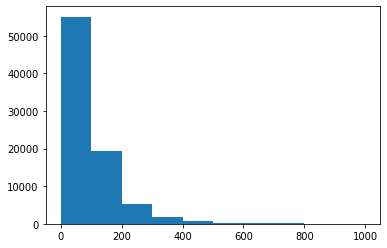

In [90]:
plt.hist(_train_seg["x_len"], range=(0,1000))
plt.show()

In [102]:
_test_seg['test_seg_x'] = _test_seg[['Question', 'Dialogue']].apply(lambda x: ' '.join(x), axis=1)
_test_seg['x_len'] = _test_seg['test_seg_x'].apply(lambda x: len(x.strip().split(" ")))

In [108]:
_train_seg['train_seg_x'].to_csv("test", index=None)

E:\software\Anaconda3\envs\tf2.0\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
